In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
from matplotlib.gridspec import GridSpec
import cartopy
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
import os
import sys
user_home_dir = os.path.expanduser('~')
sys.path.insert(0,os.path.join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
from scipy.spatial import cKDTree
import ess25_icesheet_scripts as ice

In [2]:
ecco_v4_dir = '/efs_ecco/ECCO/V4'
grid_file = os.path.join(ecco_v4_dir,'r4','ECCO_L4_GEOMETRY_LLC0090GRID_V4R4',
            'GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

grid = xr.open_dataset(grid_file).load();
grid['Z'][4]

<xarray.DataArray 'Z' ()> Size: 4B
array(-45., dtype=float32)
Coordinates:
    k        int32 4B 4
    Z        float32 4B -45.0
Attributes:
    long_name:              depth of tracer grid cell center
    units:                  m
    positive:               up
    bounds:                 Z_bnds
    comment:                Non-uniform vertical spacing.
    coverage_content_type:  coordinate
    standard_name:          depth

In [3]:
variables = ['T','S','SSH','OBP','VEL','SIarea','SIheight']
#             0   1    2     3     4      5          6
var = variables[4]
print(var)

computemean = 1

VEL


In [4]:
if var == 'T':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/THETA_mon_mean'
if var == 'S':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/SALT_mon_mean'
if var == 'SSH':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/SSH_mon_mean'
if var == 'VEL':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/UVEL_mon_mean'
    path_new2 = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/VVEL_mon_mean'
    filelist_new2 = sorted(os.listdir(path_new2))
    filelist_new2 = filelist_new2[0::2]
if var == 'SIarea':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/SIarea_mon_mean'
if var == 'SIheight':
    path_new = '/efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/SIheff_mon_mean'

filelist_new = sorted(os.listdir(path_new))
filelist_new = filelist_new[0::2]
filelist_new = filelist_new[120:240] # 22 years
runlength = len(filelist_new)
print(runlength)
for i, d in enumerate(filelist_new):
    print(str(i).zfill(3),d)

120
000 UVEL_mon_mean.0000088404.data
001 UVEL_mon_mean.0000089076.data
002 UVEL_mon_mean.0000089820.data
003 UVEL_mon_mean.0000090540.data
004 UVEL_mon_mean.0000091284.data
005 UVEL_mon_mean.0000092004.data
006 UVEL_mon_mean.0000092748.data
007 UVEL_mon_mean.0000093492.data
008 UVEL_mon_mean.0000094212.data
009 UVEL_mon_mean.0000094956.data
010 UVEL_mon_mean.0000095676.data
011 UVEL_mon_mean.0000096420.data
012 UVEL_mon_mean.0000097164.data
013 UVEL_mon_mean.0000097836.data
014 UVEL_mon_mean.0000098580.data
015 UVEL_mon_mean.0000099300.data
016 UVEL_mon_mean.0000100044.data
017 UVEL_mon_mean.0000100764.data
018 UVEL_mon_mean.0000101508.data
019 UVEL_mon_mean.0000102252.data
020 UVEL_mon_mean.0000102972.data
021 UVEL_mon_mean.0000103716.data
022 UVEL_mon_mean.0000104436.data
023 UVEL_mon_mean.0000105180.data
024 UVEL_mon_mean.0000105924.data
025 UVEL_mon_mean.0000106620.data
026 UVEL_mon_mean.0000107364.data
027 UVEL_mon_mean.0000108084.data
028 UVEL_mon_mean.0000108828.data
029 UVEL_m

In [5]:
if var == 'T':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_TEMPERATURE_SALINITY/'
if var == 'S':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_TEMPERATURE_SALINITY/'
if var == 'SSH':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/SEA_SURFACE_HEIGHT/'
if var == 'VEL':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/OCEAN_VELOCITY/'
if var == 'SIarea':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/SEA_ICE_CONC_THICKNESS/'
if var == 'SIheight':
    path_r4 = '/efs_ecco/ECCO/V4/r5/netcdf/native/mon_mean/SEA_ICE_CONC_THICKNESS/'

filelist_r4 = sorted(os.listdir(path_r4))
filelist_r4 = filelist_r4[0:runlength]
print(len(filelist_r4))
for i, d in enumerate(filelist_r4):
    print(str(i).zfill(3),d)

120
000 OCEAN_VELOCITY_mon_mean_1992-01_ECCO_V4r5_native_llc0090.nc
001 OCEAN_VELOCITY_mon_mean_1992-02_ECCO_V4r5_native_llc0090.nc
002 OCEAN_VELOCITY_mon_mean_1992-03_ECCO_V4r5_native_llc0090.nc
003 OCEAN_VELOCITY_mon_mean_1992-04_ECCO_V4r5_native_llc0090.nc
004 OCEAN_VELOCITY_mon_mean_1992-05_ECCO_V4r5_native_llc0090.nc
005 OCEAN_VELOCITY_mon_mean_1992-06_ECCO_V4r5_native_llc0090.nc
006 OCEAN_VELOCITY_mon_mean_1992-07_ECCO_V4r5_native_llc0090.nc
007 OCEAN_VELOCITY_mon_mean_1992-08_ECCO_V4r5_native_llc0090.nc
008 OCEAN_VELOCITY_mon_mean_1992-09_ECCO_V4r5_native_llc0090.nc
009 OCEAN_VELOCITY_mon_mean_1992-10_ECCO_V4r5_native_llc0090.nc
010 OCEAN_VELOCITY_mon_mean_1992-11_ECCO_V4r5_native_llc0090.nc
011 OCEAN_VELOCITY_mon_mean_1992-12_ECCO_V4r5_native_llc0090.nc
012 OCEAN_VELOCITY_mon_mean_1993-01_ECCO_V4r5_native_llc0090.nc
013 OCEAN_VELOCITY_mon_mean_1993-02_ECCO_V4r5_native_llc0090.nc
014 OCEAN_VELOCITY_mon_mean_1993-03_ECCO_V4r5_native_llc0090.nc
015 OCEAN_VELOCITY_mon_mean_1993-04_

In [6]:
data=xr.open_dataset(os.path.join(path_r4,filelist_r4[0])).load();
files_r4=[os.path.join(path_r4,filelist_r4[x]) for x in range(0,runlength)]
data=xr.open_mfdataset(files_r4,concat_dim='time',combine='nested')

if var == 'T':
    data=data.drop_vars('SALT')
    data=data.rename({'THETA':'OLD'})
if var == 'S':
    data=data.drop_vars('THETA')
    data=data.rename({'SALT':'OLD'})
if var == 'SSH':
    data=data.drop_vars('SSHNOIBC')
    data=data.drop_vars('SSHIBC')
    data=data.drop_vars('ETAN')
    data=data.rename({'SSH':'OLD'})
if var == 'VEL':
    data['OLD'] = (('time','k','tile','j','i'),np.sqrt(np.array(data['UVEL'])**2+np.array(data['VVEL']**2)))
    data=data.drop_vars('UVEL')
    data=data.drop_vars('VVEL')
    data=data.drop_vars('WVEL')
if var == 'SIarea':
    data=data.drop_vars('SIheff')
    data=data.drop_vars('SIhsnow')
    data=data.drop_vars('sIceLoad')
    data=data.rename({'SIarea':'OLD'})
if var == 'SIheight':
    data['OLD'] = (('time','tile','j','i'),np.array(data['SIarea'])*np.array(data['SIheff']))
    data=data.drop_vars('SIarea')
    data=data.drop_vars('SIheff')
    data=data.drop_vars('SIhsnow')
    data=data.drop_vars('sIceLoad')
data

<xarray.Dataset> Size: 3GB
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 120, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds     (k, nv) float32 400B dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    OLD        (time, k, tile, j, i) float32 3GB nan nan nan nan ... nan nan nan
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty, Ou Wang, Ichiro Fukumori
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Velocity - Monthly Mean llc90...
    uuid:                            71066084-271c-11f0-903b-0a58a9feac02

In [7]:
if (var == 'T') | (var=='S'):
    new = np.zeros([runlength,50,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new, filelist_new[i], nk=-1)
        new_i = np.reshape(new_i,([1,50,13,90,90]))
        new[i,:,:,:,:] = new_i
        new = np.where(new_i==0,np.nan,new)
    data['NEW'] = (('time','k','tile','j','i'), new)
    
if var == 'SSH':
    new = np.zeros([runlength,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new, filelist_new[i], nk=-1)
        new_i = np.reshape(new_i,([1,13,90,90]))
        new[i,:,:,:] = new_i
        new = np.where(new==0,np.nan,new)
    data['NEW'] = (('time','tile','j','i'), new)

if var == 'VEL':
    new = np.zeros([runlength,50,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new, filelist_new[i], nk=-1)
        new_i = np.reshape(new_i,([1,50,13,90,90]))
        new[i,:,:,:,:] = new_i
        new = np.where(new_i==0,np.nan,new)
    new2 = np.zeros([runlength,50,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new2, filelist_new2[i], nk=-1)
        new_i = np.reshape(new_i,([1,50,13,90,90]))
        new2[i,:,:,:,:] = new_i
        new2 = np.where(new_i==0,np.nan,new2)
    data['NEW'] = (('time','k','tile','j','i'), np.sqrt(new**2+new2**2))

if var == 'SIarea':
    new = np.zeros([runlength,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new, filelist_new[i], nk=-1)
        new_i = np.reshape(new_i,([1,13,90,90]))
        new[i,:,:,:] = new_i
        #new = np.where(new==0,np.nan,new)
    data['NEW'] = (('time','tile','j','i'), new)

if var == 'SIheight':
    new = np.zeros([runlength,13,90,90])
    for i in range(0,runlength):
        new_i = ecco.read_llc_to_tiles(path_new, filelist_new[i], nk=-1)
        new_i = np.reshape(new_i,([1,13,90,90]))
        new[i,:,:,:] = new_i
        #new = np.where(new==0,np.nan,new)
    data['NEW'] = (('time','tile','j','i'), new)

load_binary_array: loading file /efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/UVEL_mon_mean/UVEL_mon_mean.0000088404.data
load_binary_array: loading all 2D records.  nk = 50
load_binary_array: data array shape  (50, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /efs_ecco/sjensen/FW_test/WORKINGDIR/ECCOV4/release4/run6/diags/UVEL_mon_mean/UVEL_mon_mean.0000089076.data
load_binary_array: loading all 2D records.  nk = 50
load_binary_array: data array shape  (50, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (50, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (50, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /e

In [8]:
data

<xarray.Dataset> Size: 8GB
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 120, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds     (k, nv) float32 400B dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    OLD        (time, k, tile, j, i) float32 3GB nan nan nan nan ... nan nan nan
    NEW        (time, k, tile, j, i) float64 5GB nan nan nan nan ... nan nan nan
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty, Ou Wang, Ichiro Fukumori
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Velocity - Monthly Mean llc90...
    uuid:                            71066084-271c-11f0-903b-0a58a9feac02

In [9]:
if computemean == 1:
    data = data.groupby("time.month").mean()
data

<xarray.Dataset> Size: 763MB
Dimensions:  (month: 12, k: 50, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90,
              k_u: 50, k_l: 50, k_p1: 51, nb: 4, nv: 2)
Coordinates: (12/21)
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...       ...
    Zu       (k_u) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    Zl       (k_l) float32 200B dask.array<chunksize=(50,), meta=np.ndarray>
    XC_bnds  (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds  (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds   (k, nv) float32 400B dask.array<chunksize=(50, 2), meta=np.ndarray>
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nb, nv
Data variables:
    OLD      (month, k, tile, j, i) float32 253MB nan nan nan ... nan nan nan
    NEW      (month, k, tile, j, i) float64 505MB nan nan nan ... nan nan nan
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty, Ou Wang, Ichiro Fukumori
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Velocity - Monthly Mean llc90...
    uuid:                            71066084-271c-11f0-903b-0a58a9feac02

In [10]:
month = np.linspace(0,11,12).astype('int8')
print(month)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


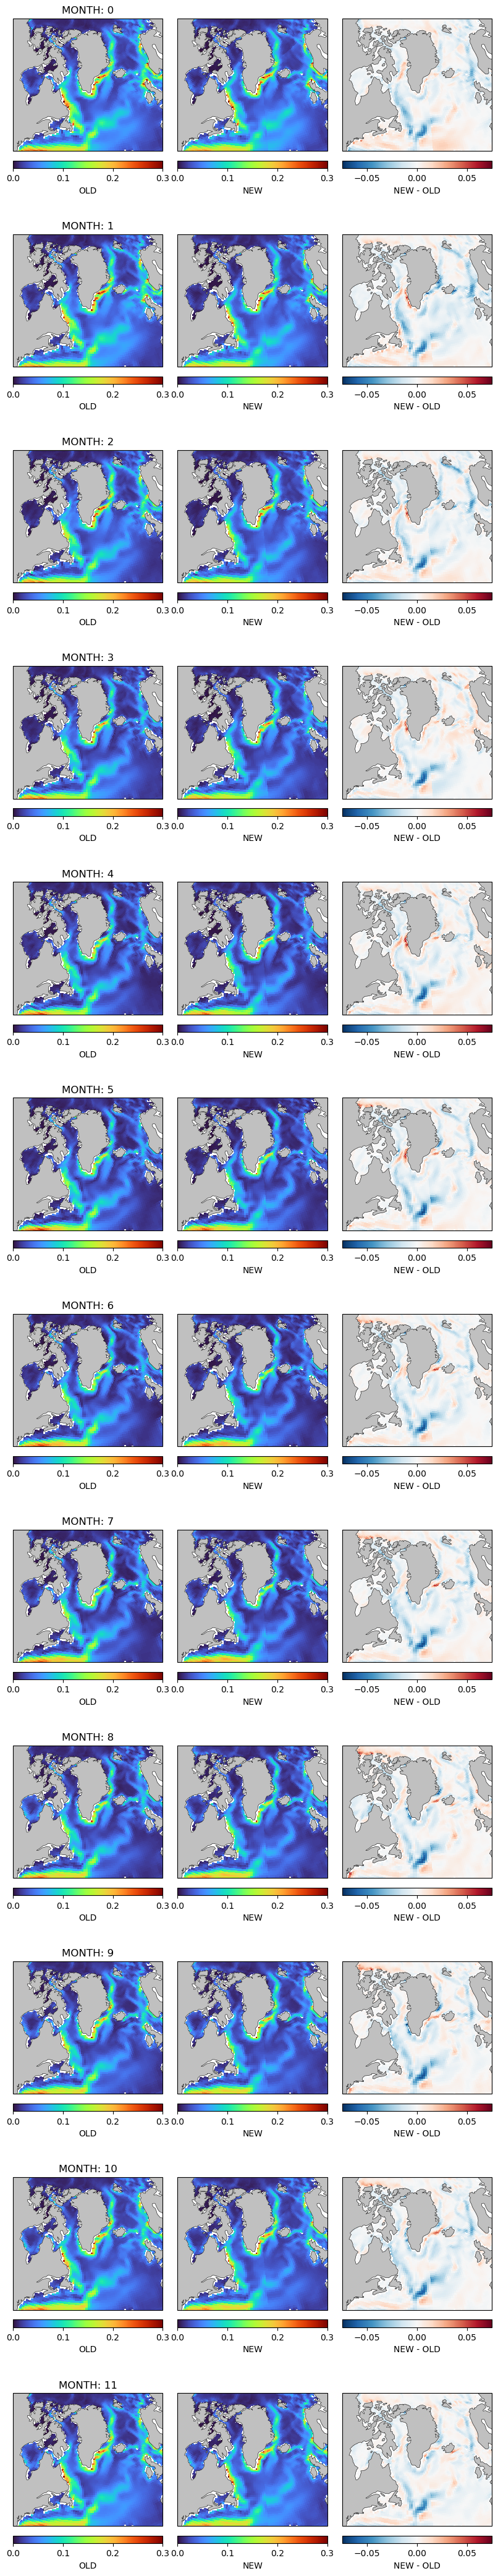

In [11]:
depth = np.linspace(0,4,5).astype('int8') # upper 45 meters
#depth = 1

#extent=[-70, -18, 45, 88]
extent=[-80,-10,40,89]

if var == 'T':
    vmin=-3
    vmax=20
    vmin_diff = -2
    vmax_diff = 2
if var == 'S':
    vmin=31
    vmax=37
    vmin_diff = -1.5
    vmax_diff = 1.5
if var == 'SSH':
    vmin=-1
    vmax=0.5
    vmin_diff = -0.5
    vmax_diff = 0.5
if var == 'VEL':
    vmin=0
    vmax=0.3
    vmin_diff = -0.075
    vmax_diff = 0.075
if var == 'SIarea':
    vmin=0
    vmax=1
    vmin_diff = -0.6
    vmax_diff = 0.6
if var == 'SIheight':
    vmin=0
    vmax=3
    vmin_diff = -0.5
    vmax_diff = 0.5
    
tile_list = [2,6,10]

fig = plt.figure(figsize=(10,4.5*len(month)))
gs = GridSpec(1*len(month),3)

for i in range(0,len(month)):
    ax1 = fig.add_subplot(gs[i,0], projection = ccrs.Orthographic(
            central_longitude=-45,
            central_latitude=45
            ))
    for tile in tile_list:
        if (var=='T') | (var=='S') | (var=='VEL'):
            if np.size(depth) == 1:
                sc=ax1.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                                   data.OLD[month[i],depth,tile,:,:],
                                   transform=ccrs.PlateCarree(),
                                   vmin=vmin, vmax=vmax, 
                                   cmap='turbo')
            else:
                sc=ax1.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                                   data.OLD[month[i],depth,tile,:,:].mean(dim='k',skipna=True),
                                   transform=ccrs.PlateCarree(),
                                   vmin=vmin, vmax=vmax, 
                                   cmap='turbo')
        if (var=='SSH') | (var=='SIarea') | (var=='SIheight'):
            sc=ax1.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                               data.OLD[month[i],tile,:,:],
                               transform=ccrs.PlateCarree(),
                               vmin=vmin, vmax=vmax, 
                               cmap='turbo')
    ax1.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver', linewidth=0.4)
    ax1.set_extent(extent, crs=ccrs.PlateCarree())
    if computemean == 1:
        ax1.set_title('MONTH: '+str(month[i]))
    else:
        ax1.set_title(data['time'][month[i]].dt.strftime("%B %Y").item())
    cb=plt.colorbar(sc,orientation='horizontal',pad=0.05,label='OLD')

    
    ax2 = fig.add_subplot(gs[i,1], projection = ccrs.Orthographic(
            central_longitude=-45,
            central_latitude=45
            ))
    for tile in tile_list:
        if (var == 'T') | (var=='S') | (var=='VEL'):
            if np.size(depth) == 1:
                sc=ax2.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                                   data.NEW[month[i],depth,tile,:,:],
                                   transform=ccrs.PlateCarree(),
                                   vmin=vmin, vmax=vmax, 
                                   cmap='turbo')
            else:
                sc=ax2.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                                   data.NEW[month[i],depth,tile,:,:].mean(dim='k',skipna=True),
                                   transform=ccrs.PlateCarree(),
                                   vmin=vmin, vmax=vmax, 
                                   cmap='turbo')
        if (var == 'SSH') | (var=='SIarea') | (var=='SIheight'):
            sc=ax2.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                               data.NEW[month[i],tile,:,:],
                               transform=ccrs.PlateCarree(),
                               vmin=vmin, vmax=vmax, 
                               cmap='turbo')
    ax2.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver', linewidth=0.4)
    ax2.set_extent(extent, crs=ccrs.PlateCarree())
    ax2.set_title('')
    cb=plt.colorbar(sc,orientation='horizontal',pad=0.05,label='NEW')
    
    ax3 = fig.add_subplot(gs[i,2], projection = ccrs.Orthographic(
            central_longitude=-45,
            central_latitude=45
            ))
    for tile in tile_list:
        if (var == 'T') | (var=='S') | (var=='VEL'):
            if np.size(depth) == 1:
                sc=ax3.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                               data.NEW[month[i],depth,tile,:,:]-data.OLD[month[i],depth,tile,:,:],
                               transform=ccrs.PlateCarree(),
                               vmin=vmin_diff,vmax=vmax_diff,
                               cmap='RdBu_r')
            else:
                sc=ax3.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                           data.NEW[month[i],depth,tile,:,:].mean(dim='k',skipna=True)-data.OLD[month[i],depth,tile,:,:].mean(dim='k',skipna=True),
                           transform=ccrs.PlateCarree(),
                           vmin=vmin_diff,vmax=vmax_diff,
                           cmap='RdBu_r')
        if (var == 'SSH') | (var=='SIarea') | (var=='SIheight'):
            sc=ax3.pcolormesh(grid.XC[tile,:,:], grid.YC[tile,:,:],
                           data.NEW[month[i],tile,:,:]-data.OLD[month[i],tile,:,:],
                           transform=ccrs.PlateCarree(),
                           vmin=vmin_diff,vmax=vmax_diff,
                           cmap='RdBu_r')
    ax3.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver', linewidth=0.4)
    ax3.set_extent(extent, crs=ccrs.PlateCarree())
    ax3.set_title('')
    cb=plt.colorbar(sc,orientation='horizontal',pad=0.05,label='NEW - OLD')
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)